$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

$\color{yellow}{\text{Interpolacja Lagrange'a}}$

In [3]:
def calculate_lagrange(x, points):
    result = 0
    n = len(points)
    for i, (x_i, y_i) in enumerate(points):
        l_i = 1

        for j in range(n):
            if j != i:
                x_j, _ = points[j]
                l_i *= (x - x_j) / (x_i - x_j)
        result += y_i * l_i
    return result

$\color{yellow}{\text{Zadanie 1}}$

In [4]:
def f1(x):
    return 1/(1+25 * x**2)

def f2(x):
    return np.exp(np.cos(x))

a) Dla funkcji Rungego, $f_1(x)$, z n = 12 wezlami interpolacji przedstaw na
wspolnym wykresie funkcje $f_1(x)$ oraz wyznaczone wielomiany interpolacyjne
i funkcje sklejana. W celu stworzenia wykresu wykonaj próbkowanie
funkcji $f_1(x)$ i wielomianow interpolacyjnych na 10 razy gestszym zbiorze
(próbkowanie jednostajne w x dla wezlow równoodleglych, jednostajne w $\theta$
dla wezlow Czebyszewa). Pamietaj o podpisaniu wykresu i osi oraz o legendzie.

In [5]:
n = 12

x_dense = np.linspace(-1, 1, 12 * (n + 1))
y_dense = f1(x_dense)

# Rownoodlegle wezly
x_equidistant = np.linspace(-1, 1, n + 1)
y_equidistant = f1(x_equidistant)

y_lagrange_equidistant = np.array([calculate_lagrange(x, list(zip(x_equidistant, y_equidistant))) for x in x_dense])

# Wezly Czebyszewa
r = np.cos((2*np.arange(n+1) + 1) / (2*(n+1)) * np.pi)
x_chebyshev = -1 + (1 + 1) * (r + 1) / 2
y_chebyshev = f1(x_chebyshev)

y_lagrange_chebyshev = np.array([calculate_lagrange(x, list(zip(x_chebyshev, y_chebyshev))) for x in x_dense])

# Interpolacja kubicznymi funkcjami sklejanymi
spline_cubic = sp.interpolate.interp1d(x_equidistant, y_equidistant, kind='cubic')
y_spline_cubic = spline_cubic(x_dense)

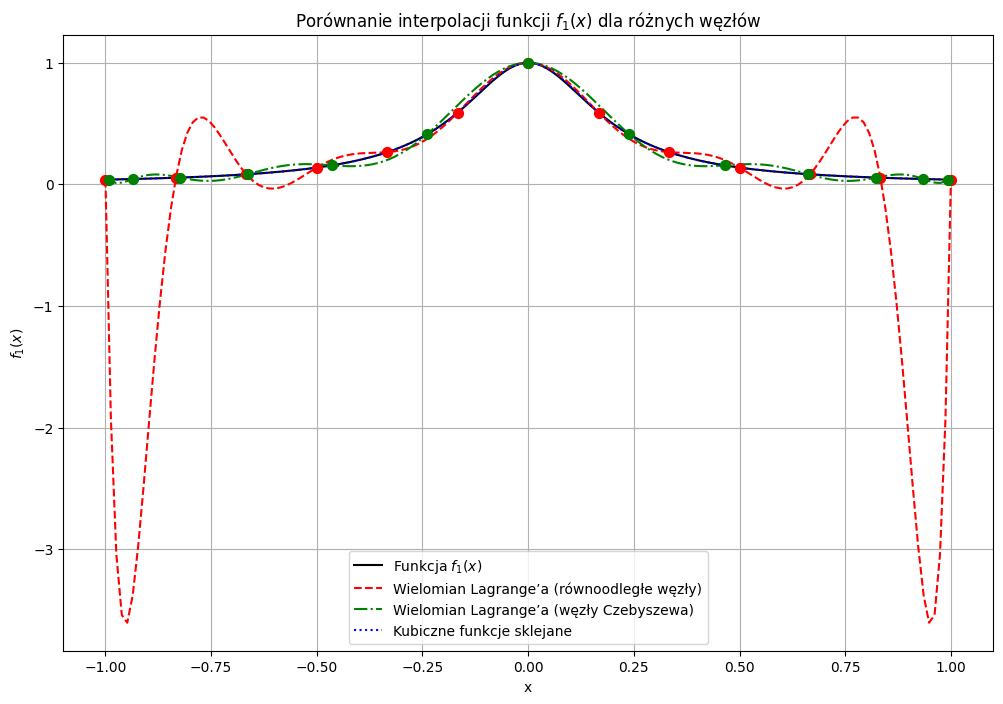

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(x_dense, y_dense, label='Funkcja $f_1(x)$', color='black')
plt.plot(x_dense, y_lagrange_equidistant, '--', label='Wielomian Lagrange’a (równoodległe węzły)', color='red')
plt.plot(x_dense, y_lagrange_chebyshev, '-.', label='Wielomian Lagrange’a (węzły Czebyszewa)', color='green')
plt.plot(x_dense, y_spline_cubic, ':', label='Kubiczne funkcje sklejane', color='blue')
plt.scatter(x_equidistant, f1(x_equidistant), color='red', s=50, zorder=5)
plt.scatter(x_chebyshev, f1(x_chebyshev), color='green', s=50, zorder=5)
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.title('Porównanie interpolacji funkcji $f_1(x)$ dla różnych węzłów')
plt.legend()
plt.grid(True)
plt.show()

b) Wykonaj interpolacje funkcji $f_1(x)$ i $f_2(x)$ z n = 4, 5,..., 50 wezlami interpolacji,
uzywajac kazdej z powyzszych trzech metod interpolacji. Ewaluacje
funkcji, wielomianów interpolacyjnych oraz funkcji sklejanych przeprowadz
na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. Stwórz dwa
rysunki, jeden dla $f_1(x)$, drugi dla $f_2(x)$. Na kazdym rysunku przedstaw razem
wykresy normy wektora bledów (czyli długosci wektora) na tym zbiorze
punktów w zaleznosci od liczby wezłów interpolacji, n, dla kazdej z trzech
metod interpolacji.
Która metoda interpolacji jest najbardziej dokładna, a która najmniej?

In [7]:
n_values = np.arange(4, 51)

def calculate_error_norm(interpolated_values, actual_values):
    return np.linalg.norm(interpolated_values - actual_values)

In [8]:
def perform_interpolation_experiment(f, domain, n_values):
    np.random.seed(42)  # Zapewnienie powtarzalnosci wynikow
    random_points = np.random.uniform(domain[0], domain[1], 500)
    actual_values = f(random_points)
    
    errors_lagrange_equidistant = []
    errors_lagrange_chebyshev = []
    errors_spline_cubic = []
    
    for n in n_values:
        # Rownoodlegle wezly
        x_equidistant = np.linspace(domain[0], domain[1], n)
        y_equidistant = f(x_equidistant)
        y_lagrange_equidistant = np.array([calculate_lagrange(x, list(zip(x_equidistant, y_equidistant))) for x in random_points])

        # Wezly Czebyszewa
        x_chebyshev = np.cos((2 * np.arange(n) + 1) / (2 * n) * np.pi)
        x_chebyshev_transformed = domain[0] + (domain[1] - domain[0]) * (x_chebyshev + 1) / 2
        y_chebyshev = f(x_chebyshev_transformed)
        y_lagrange_chebyshev = np.array([calculate_lagrange(x, list(zip(x_chebyshev_transformed, y_chebyshev))) for x in random_points])

        # Interpolacja kubicznymi funkcjami sklejanymi dla rownoodleglych wezlow
        spline_cubic = sp.interpolate.interp1d(x_equidistant, y_equidistant, kind='cubic')
        y_spline_cubic = spline_cubic(random_points)

        # Obliczenie bledow
        errors_lagrange_equidistant.append(calculate_error_norm(y_lagrange_equidistant, actual_values))
        errors_lagrange_chebyshev.append(calculate_error_norm(y_lagrange_chebyshev, actual_values))
        errors_spline_cubic.append(calculate_error_norm(y_spline_cubic, actual_values))
    
    return errors_lagrange_equidistant, errors_lagrange_chebyshev, errors_spline_cubic

errors_f1_lagrange_equidistant, errors_f1_lagrange_chebyshev, errors_f1_spline_cubic = perform_interpolation_experiment(f1, [-1, 1], n_values)
errors_f2_lagrange_equidistant, errors_f2_lagrange_chebyshev, errors_f2_spline_cubic = perform_interpolation_experiment(f2, [0, 2*np.pi], n_values)

Wykres dla $f_1(x)$.

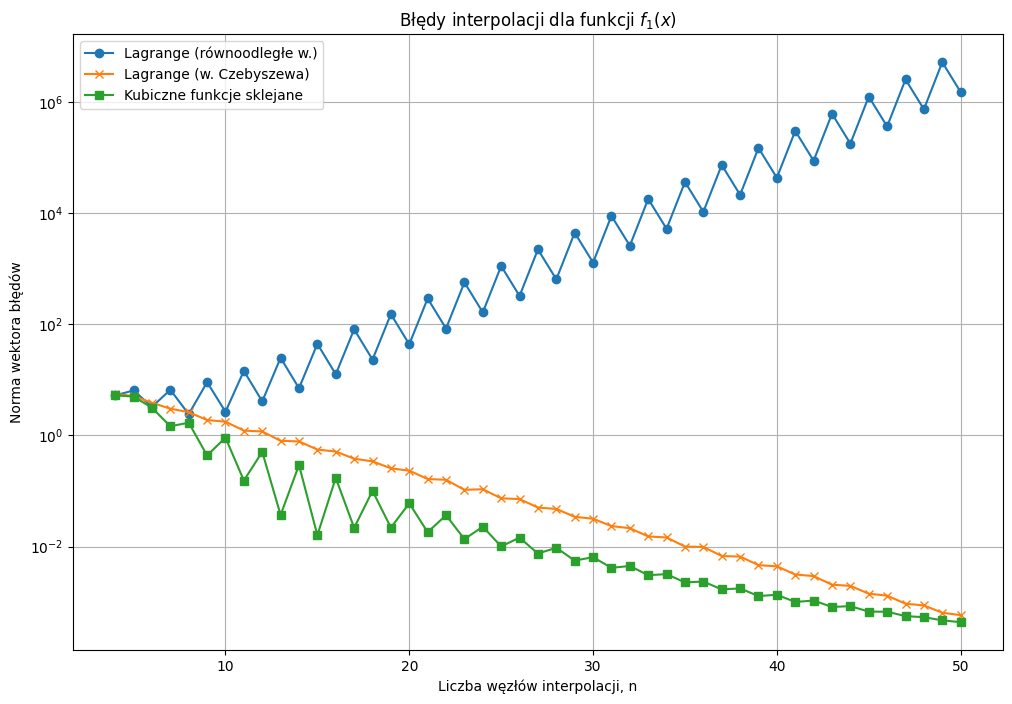

Średni błąd interpolacji dla funkcji f1(x)
Równoodległe węzły: 280518.2218
Węzły Czebyszewa: 0.6615
Kubiczne funkcje sklejane: 0.4143


In [9]:
plt.figure(figsize=(12, 8))
plt.plot(n_values, errors_f1_lagrange_equidistant, label='Lagrange (równoodległe w.)', marker='o')
plt.plot(n_values, errors_f1_lagrange_chebyshev, label='Lagrange (w. Czebyszewa)', marker='x')
plt.plot(n_values, errors_f1_spline_cubic, label='Kubiczne funkcje sklejane', marker='s')
plt.xlabel('Liczba węzłów interpolacji, n')
plt.ylabel('Norma wektora błędów')
plt.yscale('log')
plt.title('Błędy interpolacji dla funkcji $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()

print("Średni błąd interpolacji dla funkcji f1(x)")
print(f"Równoodległe węzły: {np.mean(errors_f1_lagrange_equidistant):2.4f}")
print(f"Węzły Czebyszewa: {np.mean(errors_f1_lagrange_chebyshev):2.4f}")
print(f"Kubiczne funkcje sklejane: {np.mean(errors_f1_spline_cubic):2.4f}")

Wykres dla $f_2(x)$.

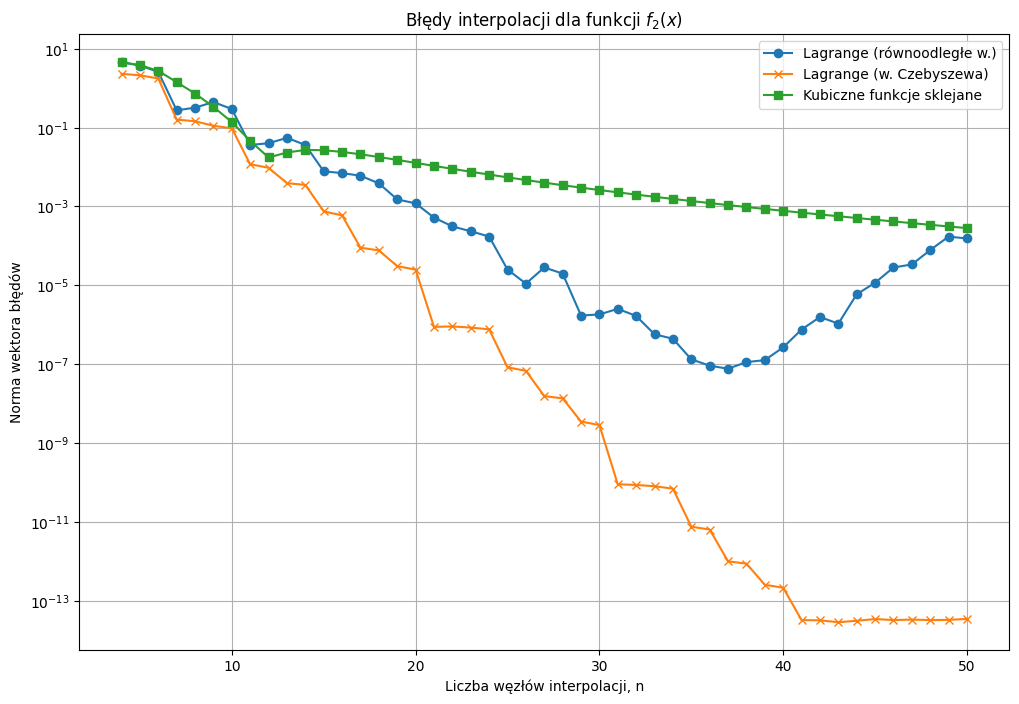

Średni błąd interpolacji dla funkcji f2(x)
Równoodległe węzły: 0.2637
Węzły Czebyszewa: 0.1430
Kubiczne funkcje sklejane: 0.2991


In [11]:
plt.figure(figsize=(12, 8))
plt.plot(n_values, errors_f2_lagrange_equidistant, label='Lagrange (równoodległe w.)', marker='o')
plt.plot(n_values, errors_f2_lagrange_chebyshev, label='Lagrange (w. Czebyszewa)', marker='x')
plt.plot(n_values, errors_f2_spline_cubic, label='Kubiczne funkcje sklejane', marker='s')
plt.xlabel('Liczba węzłów interpolacji, n')
plt.ylabel('Norma wektora błędów')
plt.yscale('log')
plt.title('Błędy interpolacji dla funkcji $f_2(x)$')
plt.legend()
plt.grid(True)
plt.show()

print("Średni błąd interpolacji dla funkcji f2(x)")
print(f"Równoodległe węzły: {np.mean(errors_f2_lagrange_equidistant):2.4f}")
print(f"Węzły Czebyszewa: {np.mean(errors_f2_lagrange_chebyshev):2.4f}")
print(f"Kubiczne funkcje sklejane: {np.mean(errors_f2_spline_cubic):2.4f}")